# Using a BNN for probabilistic ocean regime predictions
### EXERCISE

The exercise below is based on the work done in 

Clare et al. (2022) *Explainable Artificial Intelligence for Bayesian Neural Networks: Toward Trustworthy Predictions of Ocean Dynamics* Journal of Advances in Modeling Earth Systems 14 (11), e2022MS003162 [link](https://agupubs.onlinelibrary.wiley.com/doi/full/10.1029/2022MS003162)

In that paper, a Bayesian Neural Network was used to make a probabilistic prediction of ocean circulation regimes. You will learn more about this dataset and how the ocean regimes were identified from Maike Sonnewald in Tier 3. Note that Clare et al. (2022) builds on work in [Sonnewald & Lguensat (2021)](https://doi.org/10.1029/2021MS002496) who built a deterministic neural network for the same problem and [Sonnewald et al. (2019)](https://doi.org/10.1029/2018ea000519), where the ocean regimes were first identified by k-means clustering. 

The input features for our neural network are as follows:

1.   Wind stress curl
2.   Mean Sea Surface Height (SSH) (20 years)
3.   Gradients of Mean Sea Surface Height
4.   Bathymetry
5.   Gradients of bathymetry
6.   Coriolis

For justification of this choice of these features please see Sonnewald & Lguensat (2021). 

## How to run this exercise

This exercise is in the form of a [Jupyter notebook](https://jupyter.org/). It can be run in a number of free cloud based environments (see two options below). These require no installation. When you click on one of the links below ("Open in Colab" or "Open in Kaggle") you will be prompted to create a free account, after which you will see the same page you see here. Follow the instructions below to connect to a GPU. After that you can run each block of code by selecting shift+control repeatedly, or by selecting the "play" icon.

Please note that in this exercise you will be asked to insert code. However, those less familiar with Python can refer to the solutions notebook, which requires no coding.

Advanced users may wish to run this exercise on their own computers by first installing Python and Jupyter, in addition to the packages listed below (numpy, xarray, scipy and matplotlib).

<style>
td, th {
   border: 1px solid white;
   border-collapse: collapse;
}
</style>
<table align="left">
  <tr>
    <th>Run the tutorial via free cloud platforms: </th>
    <th><a href="https://colab.research.google.com/github/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/uncertainty/exercise_using_a_bnn_for_probabilistic_ocean_regime_predictions.ipynb">
        <img src = "https://colab.research.google.com/assets/colab-badge.svg" alt = "Colab"></th>
    <th><a href="https://kaggle.com/kernels/welcome?src=https://github.com/ecmwf-projects/mooc-machine-learning-weather-climate/blob/main/tier_2/uncertainty/exercise_using_a_bnn_for_probabilistic_ocean_regime_predictions.ipynb">
        <img src = "https://kaggle.com/static/images/open-in-kaggle.svg" alt = "Kaggle"></th>
  </tr>
</table>

Note that to use Kaggle, you need to enable an option on the notebook. Please follow the instructions here to do this https://stackoverflow.com/questions/68142524/cannot-access-internet-on-kaggle-notebook. 

Since we will train a neural network later, it might make sense to connect to a GPU runtime:

*   In Google Colab this can be done under Runtime --> Change runtime type.

*   In Kaggle this can be done under Accelerator.

## Import packages

In [1]:
## Import standard packages for reading data and plotting
import numpy as np
import xarray as xr
from scipy.io import loadmat
import matplotlib.pyplot as plt

## Load and process data

In [2]:
## Download input Data
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/kCluster6.npy
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/curlTau.npy
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1992.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1993.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1994.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1995.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1996.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1997.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1998.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.1999.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2000.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2001.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2002.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2003.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2004.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2005.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2006.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2007.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2008.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2009.nc
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2010.nc 
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/SSHdata/SSH.2011.nc    
! wget https://get.ecmwf.int/repository/mooc-machine-learning-weather-climate/tier_2/uncertainty/H_wHFacC.mat



zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget
zsh:1: command not found: wget


In [2]:
wind_stress_curl = np.transpose(np.load('curlTau.npy'))
monthly_ssh = xr.open_mfdataset('SSH.*.nc', combine='by_coords')
SSH20mean = monthly_ssh['SSH'].mean(axis=0).values  # 20 years mean of sea surface height
bathymetry = np.transpose(loadmat('H_wHFacC.mat')['val'])
  

In [3]:
print(monthly_ssh)

<xarray.Dataset>
Dimensions:  (i1: 240, i2: 360, i3: 720)
Coordinates:
  * i1       (i1) float64 1.0 2.0 3.0 4.0 5.0 ... 236.0 237.0 238.0 239.0 240.0
  * i2       (i2) float64 1.0 2.0 3.0 4.0 5.0 ... 356.0 357.0 358.0 359.0 360.0
  * i3       (i3) float64 1.0 2.0 3.0 4.0 5.0 ... 716.0 717.0 718.0 719.0 720.0
    lon      (i2, i3) float64 dask.array<chunksize=(360, 720), meta=np.ndarray>
    lat      (i2, i3) float64 dask.array<chunksize=(360, 720), meta=np.ndarray>
    tim      (i1) datetime64[ns] dask.array<chunksize=(12,), meta=np.ndarray>
Data variables:
    SSH      (i1, i2, i3) float64 dask.array<chunksize=(12, 360, 720), meta=np.ndarray>
Attributes: (12/31)
    description:               SSH -- ECCO v4 ocean state estimate, release 3...
    A:                         :Format      = interpolated (half degree grid)
    B:                         :source      = ECCO consortium (http://ecco-gr...
    C:                         :institution = JPL/UT/MIT/AER
    D:                    

In [4]:
## Load in ocean regimes labels as target data. These ocean regimes were determined in Sonnewald et al. 2019
ecco_label = np.transpose(np.load('kCluster6.npy'))

# replace land pixels by NaNs
ecco_label[ecco_label==-1] = np.nan 

In [5]:
ecco_label

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 5.,  5.,  5., ...,  5.,  5.,  5.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [6]:
## Calculate the SSH gradients, bathymetry gradients and coriolis

lonRoll = np.roll(monthly_ssh['lat'].values, axis=0, shift=-1)
Londiff = lonRoll - monthly_ssh['lat'].values  # equivalent to doing x_{i} - x_{i-1}

lat = monthly_ssh['lat'].values
latDiff=1.111774765625000e+05
latY=np.gradient(lat, axis=0)*latDiff
lonX=np.abs(np.cos(lat*np.pi/180))*latDiff*Londiff

##coriolis 
Omega=7.2921e-5 # coriolis parameter
f = (2*Omega*np.sin(lat*np.pi/180))

def grad(d,y,x):
    grady=np.gradient(d, axis=0)/y
    gradx=np.gradient(d, axis=1)/x
    return grady, gradx

gradSSH_y, gradSSH_x = grad(SSH20mean,latY,lonX)
gradBathm_y, gradBathm_x = grad(bathymetry,latY,lonX)

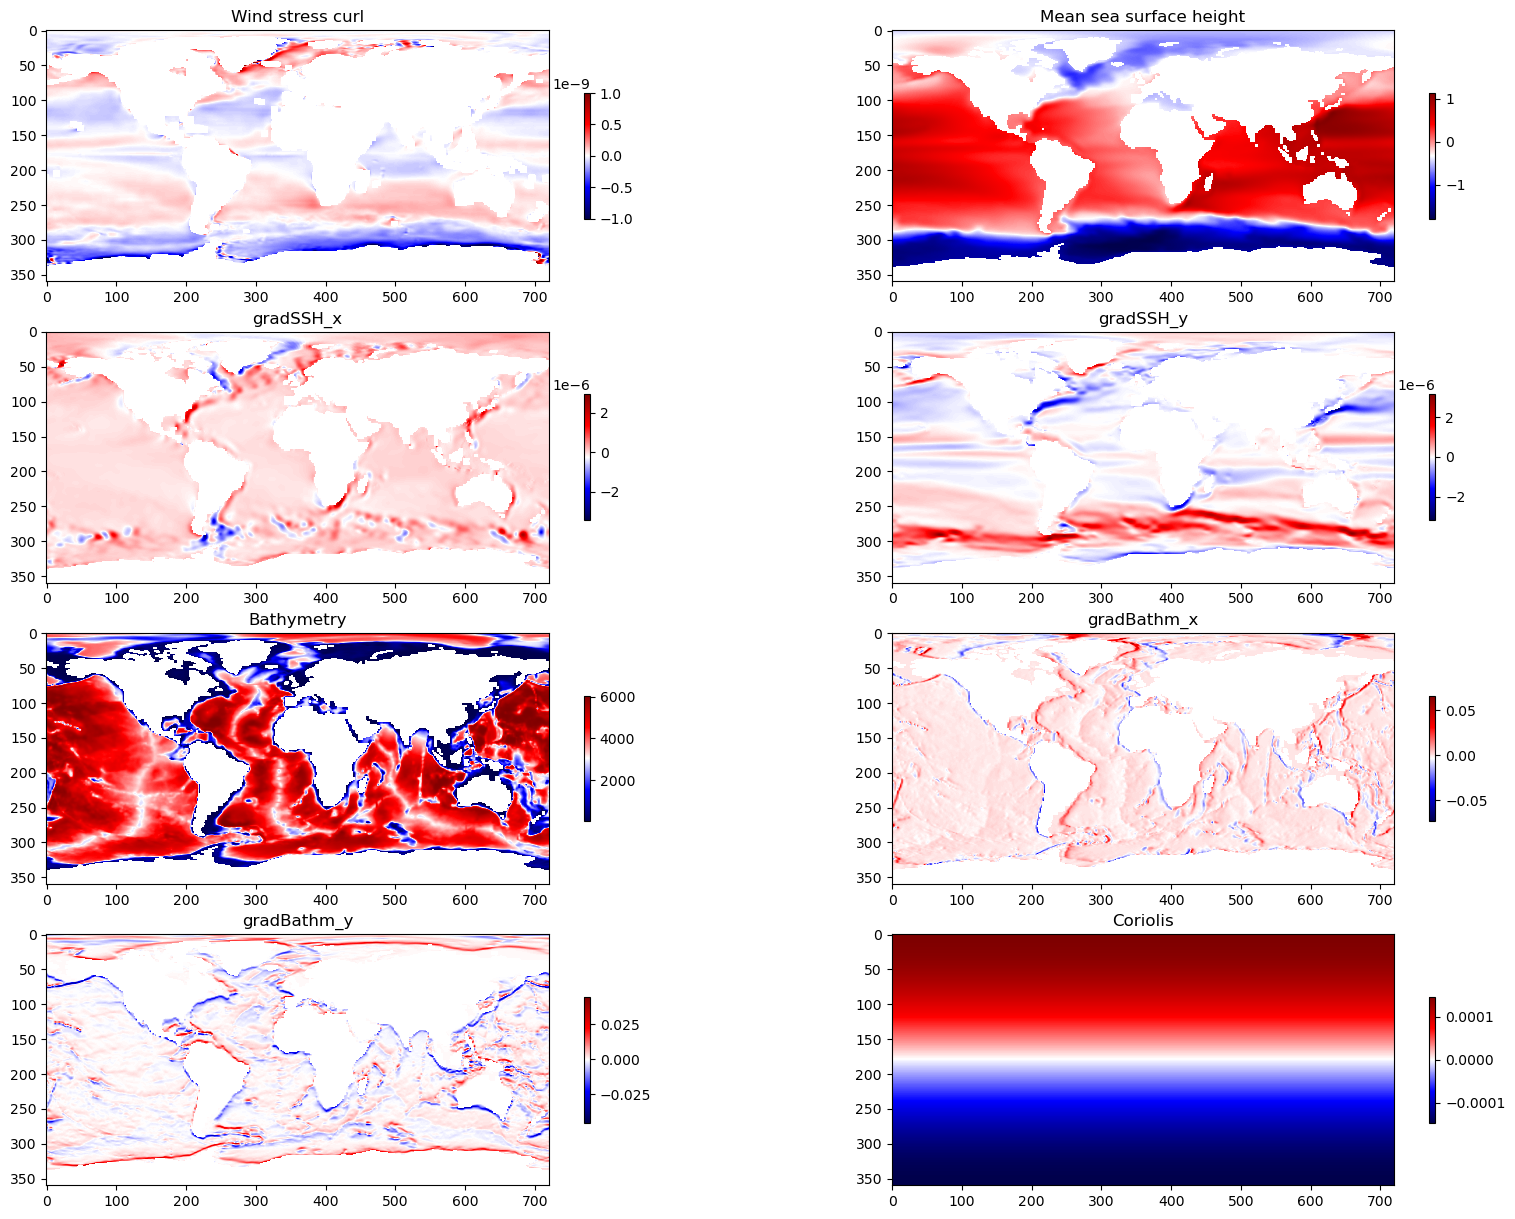

In [7]:
## Plot data

plt.figure(figsize=(20,15))

plt.subplot(4,2,1)
plt.imshow(np.flipud(wind_stress_curl), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.clim(-1e-9,1e-9)
plt.title('Wind stress curl')

plt.subplot(4,2,2)
plt.imshow(np.flipud(SSH20mean), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('Mean sea surface height')

plt.subplot(4,2,3)
plt.imshow(np.flipud(gradSSH_x), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('gradSSH_x')

plt.subplot(4,2,4)
plt.imshow(np.flipud(gradSSH_y), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('gradSSH_y')

plt.subplot(4,2,5)
plt.imshow(np.flipud(bathymetry), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('Bathymetry')

plt.subplot(4,2,6)
plt.imshow(np.flipud(gradBathm_x), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('gradBathm_x')

plt.subplot(4,2,7)
plt.imshow(np.flipud(gradBathm_y), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('gradBathm_y')

plt.subplot(4,2,8)
plt.imshow(np.flipud(f), cmap='seismic')
plt.colorbar(shrink=0.5)
plt.title('Coriolis')

plt.show()

In [8]:
## Mask land pixels and other noisy locations
missingdataindex = np.isnan(wind_stress_curl*SSH20mean*gradSSH_x*gradSSH_y*bathymetry*gradBathm_x*gradBathm_y)

## Training data is ocean dataset excluding the Atlantic Ocean
maskTraining = (~missingdataindex).copy()
maskTraining[:,200:400]=False

## Test dataset is Atlantic Ocean dataset
maskTest = (~missingdataindex).copy()
maskTest[:,list(range(200))+list(range(400,720))]=False

In [9]:
## Set up training and test datasets

TotalDataset = np.stack((wind_stress_curl[~missingdataindex],
                         SSH20mean[~missingdataindex],
                         gradSSH_x[~missingdataindex],
                         gradSSH_y[~missingdataindex],
                         bathymetry[~missingdataindex],
                         gradBathm_x[~missingdataindex],
                         gradBathm_y[~missingdataindex],
                         f[~missingdataindex]),1)

TrainDataset = np.stack((wind_stress_curl[maskTraining],
                         SSH20mean[maskTraining],
                         gradSSH_x[maskTraining],
                         gradSSH_y[maskTraining],
                         bathymetry[maskTraining],
                         gradBathm_x[maskTraining],
                         gradBathm_y[maskTraining],
                         f[maskTraining]),1)

TestDataset = np.stack((wind_stress_curl[maskTest],
                         SSH20mean[maskTest],
                         gradSSH_x[maskTest],
                         gradSSH_y[maskTest],
                         bathymetry[maskTest],
                         gradBathm_x[maskTest],
                         gradBathm_y[maskTest],
                       f[maskTest]),1)

print(TotalDataset.shape, TrainDataset.shape, TestDataset.shape)

train_label = ecco_label[maskTraining]
test_label = ecco_label[maskTest]
print(train_label.shape, test_label.shape)

(149587, 8) (109259, 8) (40328, 8)
(109259,) (40328,)


In [10]:
## Scale the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(TrainDataset)
scaler.mean_,scaler.scale_

X_train_scaled = scaler.transform(TrainDataset)
X_test_scaled = scaler.transform(TestDataset)

# Training the Bayesian Neural Network (BNN)

To use a BNN we must import both `tensorflow` and `tensorflow_probability`

In [11]:
import tensorflow as tf
import tensorflow_probability as tfp

tfd = tfp.distributions
tfpl = tfp.layers

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import RMSprop

# convert target labels to appropriate data type for tensorflow
Y_train = tf.keras.utils.to_categorical(train_label)
Y_test = tf.keras.utils.to_categorical(test_label)

# Exercise 1

The first task is to build a deterministic network to predict the ocean regimes. Evaluate the accuracy of your model.

*Hint: The data is shaped for a gridpoint-by-gridpoint approach so Dense layers are appropriate here. The target data is categorical so the last layer should have a SoftMax activation.*

In [12]:
def deterministic_model(model = None):
  # Your code here
  return model


In [ ]:
# Compile and fit the deterministic model
det_model = deterministic_model()
det_model.summary()
det_model.compile(loss = 'categorical_crossentropy', metrics = ['categorical_accuracy'],
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
det_model.fit(X_train_scaled, Y_train,
                    batch_size=32,
                    epochs=10,
                    verbose=1,
                    validation_split = 0.2, shuffle = True)

In [ ]:
# Evaluate the accuracy of this deterministic model

print(det_model.evaluate(X_train_scaled, Y_train))
print(det_model.evaluate(X_test_scaled, Y_test))

# Exercise 2

Change your deterministic neural network from Exercise 1 so that it predicts a distribution as an output, quantifying the aleatoric uncertainty. Evaluate the accuracy of your model.


*Hint: You should use the OneHotCategorical Layer from Tensorflow probability because this means that the output of the network is a distribution.*

In [1]:
def probabilistic_model():
    model = None
    ### Your code here
    return model


In [ ]:
prob_model = probabilistic_model()

prob_model.summary()

# define the negative log-likelihood function
def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

prob_model.compile(loss=nll,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

prob_model.fit(X_train_scaled, Y_train,
                    batch_size=32,
                    epochs=20,
                    verbose=1,
                    validation_split = 0.2, shuffle = True)

In [ ]:
## Example output
prob_model(X_test_scaled[0:1]).mean().numpy()

In [ ]:
# Evaluate the accuracy of this first Bayesian model

print(prob_model.evaluate(X_train_scaled, Y_train))
print(prob_model.evaluate(X_test_scaled, Y_test))

# Exercise 3

Change your neural network from Exercise 2 so that it quantifies epistemic uncertainty as well as aleatoric uncertainty. Evaluate the accuracy of your model. The accuracy will almost definitely be less than that from the deterministic model, but with the added benefit that you now have uncertainty information.

*Hint: In BNNs, the parameters (weights and biases) are distributions rather than deterministic. Standard practice with tensorflow probability is to determine this distributions using variational inference. Therefore we must define a fixed prior for each of the weights and the general shape for the posterior. Dense layers in a deterministic network are replaced with DenseVariational layers in a BNN. Note that you also have to rescale the KL divergence error so that the arguments for your DenseVariational layer should include the following arguments:*
```
kl_weight = 1/X_train_scaled.shape[0], # have to rescale the kl_error
kl_use_exact=True # use if have analytic form of prior and posterior - may error in which case change to False
```

In [ ]:
# Define the prior weight distribution -- all N(0, 1) -- and not trainable
def prior(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size
    prior_model = Sequential([
                            tfpl.DistributionLambda(
                                lambda t: tfd.MultivariateNormalDiag(loc = tf.zeros(n), scale_diag = tf.ones(n))
                            )
    ]) # normal distribution for each weight in the layer
    return prior_model

# Define variational posterior weight distribution -- multivariate Gaussian

def posterior(kernel_size, bias_size, dtype = None):
    n = kernel_size + bias_size
    posterior_model = Sequential([
                tfpl.VariableLayer(2*n, dtype=dtype),
                tfpl.DistributionLambda (
        lambda t: tfd.MultivariateNormalDiag(loc = t[..., :n], scale_diag = tf.math.exp(t[..., n:])))
    ]) # define posterior for each weight in the layer
    return posterior_model

def bnn():
    model = None
    ## Your code here
    return model

In [ ]:
bnn_model = bnn()

def nll(y_true, y_pred):
    return -y_pred.log_prob(y_true)

bnn_model.compile(loss=nll,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
              metrics=['accuracy'])

# add callbacks to save best weights
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    'bnn_weights.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=True, mode='auto', save_freq='epoch')

# and to reduce the learning rate if the error does not improve after 15 epochs
reduce_lr_callback = tf.keras.callbacks.ReduceLROnPlateau(
            monitor = 'val_loss',
            patience=15,
            factor=0.25,
            verbose=1)

# fit model
bnn_model.fit(X_train_scaled, Y_train,
                    batch_size=32,
                    epochs=100,
                    verbose=1,
                    validation_split = 0.2, shuffle = True,
                    callbacks = [checkpoint_callback, reduce_lr_callback])

In [ ]:
# Evaluate the accuracy of the BNN model

print(bnn_model.evaluate(X_train_scaled, Y_train))
print(bnn_model.evaluate(X_test_scaled, Y_test))

## Advanced: Plotting uncertainty metrics obtained from the BNN predictions

Below we provide some functions to plot the results of your BNN and assess its performance

In [ ]:
# Define functions to analyse model predictions versus true labels

def boxplot_model_predictions(prob_predictions, point_num, labels, run_ensemble = True):
    # Print the true activity
    print('------------------------------')
    print('True cluster:', labels[point_num])
    print('')

    # Print the probabilities the model assigns
    print('------------------------------')
    print('Model estimated probabilities:')
    # Create ensemble of predicted probabilities

    predicted_probabilities = prob_predictions[:, point_num, :]
    box = plt.boxplot(predicted_probabilities, positions = [0, 1, 2, 3, 4, 5])
    for i in range(6):
        if i == int(labels[point_num]):
            plt.setp(box['boxes'][i], color='green')
            plt.setp(box['medians'][i], color='green')
        else:
            plt.setp(box['boxes'][i], color='purple')
            plt.setp(box['medians'][i], color='purple')
    plt.ylim([0, 1])
    plt.ylabel('Probability')
    plt.xticks([0, 1, 2, 3, 4, 5], ["F", "E", "D", "C", "B", "A"])
    plt.xlim([5.5, -0.5])
    plt.show()        
    return predicted_probabilities
    
def get_correct_indices(prob_mean, labels):
    correct = np.argmax(prob_mean, axis=1) == np.argmax(labels, axis = 1)
    correct_indices = [i for i in range(prob_mean.shape[0]) if correct[i]]
    incorrect_indices = [i for i in range(prob_mean.shape[0]) if not correct[i]]
    return correct_indices, incorrect_indices

def plot_entropy_distribution(prob_mean, labels):
    entropy = -np.sum(prob_mean * np.log2(prob_mean), axis=1)
    corr_indices, incorr_indices = get_correct_indices(prob_mean, labels)
    indices = [corr_indices, incorr_indices]
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    for i, category in zip(range(2), ['Correct', 'Incorrect']):
        entropy_category = np.array([entropy[j] for j in indices[i]])
        mean_entropy = np.mean(entropy_category[~np.isnan(entropy_category)])
        num_samples = entropy_category.shape[0]
        #title = category + 'ly labelled ({:.2f}% of total)'.format(num_samples / x.shape[0] * 100)
        title = category + 'ly labelled'.format(num_samples / x.shape[0] * 100)
        axes[i].hist(entropy_category, weights=(1/num_samples)*np.ones(num_samples))
        axes[i].annotate('Mean: {:.3f}'.format(mean_entropy), (0.4, 0.9), ha='center')
        axes[i].set_xlabel('Entropy')
        axes[i].set_ylim([0, 1])
        #axes[i].set_ylabel('Probability')
        axes[i].set_title(title)
        print(num_samples)
    plt.show()

In [ ]:
# Generate ensemble of predictions from the BNN

ensemble_size = 200
x = X_test_scaled

prob_predictions = np.empty(shape=(ensemble_size, 40328, 6))
for i in range(ensemble_size):
    prob_predictions[i] = bnn_model(x).mean().numpy()

prob_mean = prob_predictions.mean(axis = 0)

# reshape array
pred = np.nan * np.zeros((360*720))
pred[maskTest.flatten()] = prob_mean.argmax(axis = 1)

In [ ]:
# find indices of datapoints for which the neural network is correct and indices for which it is incorrect
c_in, inc_in = get_correct_indices(prob_mean, Y_test)

#### Example of two output distributions predicted by BNN

In [ ]:
plt.rcParams["figure.figsize"] = (6.4, 4.8)

## two correct prediction
corr_0 = boxplot_model_predictions(prob_predictions, c_in[107*200], test_label, run_ensemble = True)
corr_1 = boxplot_model_predictions(prob_predictions, c_in[75*200], test_label, run_ensemble = True)

## two incorrect predictions
incorr_0 = boxplot_model_predictions(prob_predictions, inc_in[100], test_label, run_ensemble = True)
incorr_1 = boxplot_model_predictions(prob_predictions, inc_in[200], test_label, run_ensemble = True)

# Note in these box and whisker plots the distributions themselves represent the aleatoric uncertainty 
# and the box and whiskers (ie. the ensemble of possible distributions) represent the epistemic uncertainty

#### Uncertainty quantification using entropy

Model uncertainty can be quantified by calculating the [entropy](https://en.wikipedia.org/wiki/Entropy_%28information_theory%29) of the distribution. The higher the value, the more unsure the model is

In [ ]:
! pip install Basemap # note you may have this already installed and therefore do not need to run this line

In [ ]:
from mpl_toolkits.basemap import * 

plt.rcParams.update({'font.size': 16})

entropy = -np.sum(prob_mean* np.log2(prob_mean), axis=1)
all_results = np.nan * np.zeros((360*720))
all_results[maskTest.flatten()] = entropy
lat = monthly_ssh['lat']
lon = monthly_ssh['lon']
lons = lon[1,:].values
lats = lat[:,1].values
llons, llats = np.meshgrid(lons,lats)
fig, ax = plt.subplots(figsize = (12, 6))
m = Basemap(llcrnrlon=-80, urcrnrlon=20, llcrnrlat=-80, urcrnrlat=89, projection='mill', resolution='l')
m.drawmapboundary(fill_color='0.9')
m.drawparallels(np.arange(-90.,99.,30.),labels=[1,1,0,1])
m.drawmeridians(np.arange(-180.,180.,60.),labels=[0,0,0,1])
m.drawcoastlines()
m.fillcontinents()
im1 = m.pcolor(llons, llats, np.flipud(np.reshape(all_results,(360,720)))[::-1,:], latlon=True, cmap = plt.cm.Oranges)
cbar = plt.colorbar(pad=0.075)
cbar.set_label('Entropy')
im2 = m.scatter([-63.25], [23.75], marker = 'D', c = 'black',  s = 50, latlon = True)
im3 = m.scatter([-4.25], [-12.75], marker = 'D', c = 'blue',  s = 50, latlon = True)
im4 = m.scatter([-37.25], [-17.25], marker = 'D', c = 'magenta', s = 50, latlon = True)
plt.show()



In [ ]:
## For a robust trustworthy BNN, we would expect the correct predictions to have a low entropy ie. a low uncertainty, and the incorrect predictions to have a
## high entropy ie. a high uncertainty. 
## This is desirable because in simple terms, it means that the BNN is more certain of its prediction when it is correct than when it is incorrect
plot_entropy_distribution(prob_mean, Y_test)

There are also many other interesting plots that can be produced from BNN predictions as shown in Clare et al. 2022.
The code to make these plots is at the end of this [notebook on github](https://github.com/maikejulie/DNN4Cli/blob/main/THOR/BayesianApproach/THOR%20-%20Step_2_Bayesian_approach.ipynb) 